# Data Information
* **DRG Definitio**v: The code and description identifying the MS-DRG. MS-DRGs are a classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay.
* **Provider Id**: The CMS Certification Number (CCN) assigned to the Medicare certified hospital facility.
* **Provider Name**: The name of the provider.
* **Provider Street Address**: The provider’s street address.
* **Provider City**: The city where the provider is located.
* **Provider State**: The state where the provider is located.
* **Provider Zip Code**: The provider’s zip code.
* **Provider HRR**: The Hospital Referral Region (HRR) where the provider is located.
* **Total Discharges**: The number of discharges billed by the provider for inpatient hospital services.
* **Average Covered Charges**: The provider's average charge for services covered by Medicare for all discharges in the MS-DRG. 
* **Average Total Payments**: The average total payments to all providers for the MS-DRG including the MSDRG amount, teaching, disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits.
* **Average Medicare Payments**: The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits. 

Make Visualizations for:
* Top 5 treatments - biggest difference between max and min cost
* Analyze highest payment difference treatment by States
* Top 5 highest bills treatments 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../input/inpatient-hospital-charges/inpatientCharges.csv')
df.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79


In [3]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [4]:
# missing data check
df.isna().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [5]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [6]:
# change to numerical variables
vars = [' Average Covered Charges ',' Average Total Payments ', 'Average Medicare Payments']
df[vars] = df[vars].replace({'\$': ''}, regex=True).astype(float)
df["Average Patients Payments"] = df[' Average Total Payments '] - df['Average Medicare Payments']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  float64
 11  

# Biggest Differences in Total Payments

[Text(0, 0.5, '')]

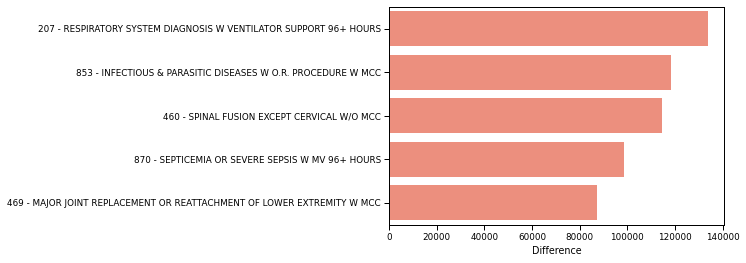

In [7]:
# Biggest Payment Difference Treatment
minmax = df[['DRG Definition',' Average Total Payments ']].groupby(by='DRG Definition').agg(['max','min'])
minmax['Difference'] = minmax[(' Average Total Payments ', 'max')] - minmax[(' Average Total Payments ',   'min')]
difference5 = minmax.sort_values(by='Difference',ascending=False).head(5)
sns.set_context("paper")
ax = sns.barplot(difference5["Difference"],difference5.index, color="tomato",alpha=0.8)
ax.set(ylabel=None)

Text(0.5, 1.0, 'Avg. Total Payments for DRG = 207')

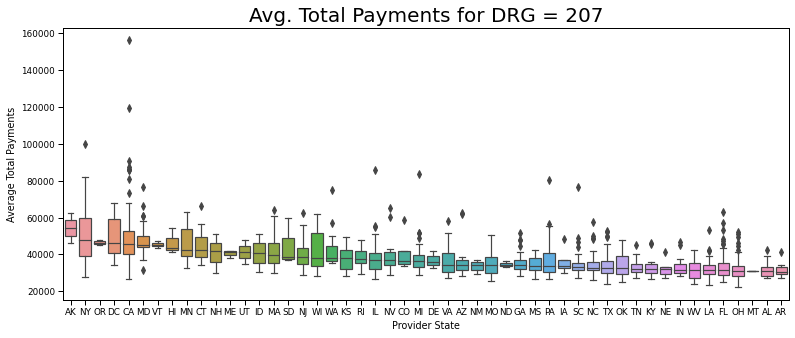

In [8]:
# Subset data with DRG Definition of 207(order by median)
df_207 = df[df["DRG Definition"] == "207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS"]
sorted_index = df_207[['Provider State', ' Average Total Payments ']].groupby(by='Provider State').median().sort_values(by=' Average Total Payments ',ascending=False).index
plt.figure(figsize=(13,5))
sns.boxplot(x="Provider State", y=" Average Total Payments ",
            order = sorted_index, data=df_207)
plt.title('Avg. Total Payments for DRG = 207',fontsize=20)

Text(0.5, 1.0, 'Avg. Patients Payment for DRG = 207')

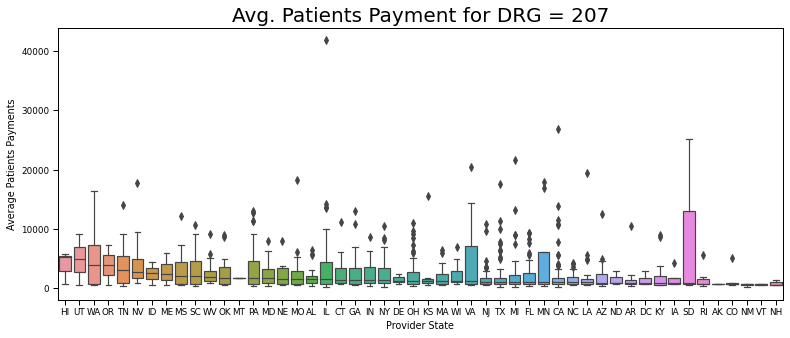

In [9]:
sorted_index = df_207[['Provider State', 'Average Patients Payments']].groupby(by='Provider State').median().sort_values(by='Average Patients Payments',ascending=False).index
plt.figure(figsize=(13,5))
sns.boxplot(x="Provider State", y="Average Patients Payments",
            order = sorted_index, data=df_207)
plt.title('Avg. Patients Payment for DRG = 207',fontsize=20)

Alaska has the exceptionally high cost for treatment of RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOUR than any other states. Montana, Arizon, Alabama have the lowest cost for the treatment.There are huge variation of the price in NewYork,Washington DC, Minnesota and Wisconsin. This needs to be further analyzed.

For the patient side, The amount they pay is highest in Hiwaii and Utah and Washington, lowest in Vermont, North Mexico and New Hampshire.

# Top5 highest bills treatments

Text(0.5, 0, 'Average Covered Charges ($)')

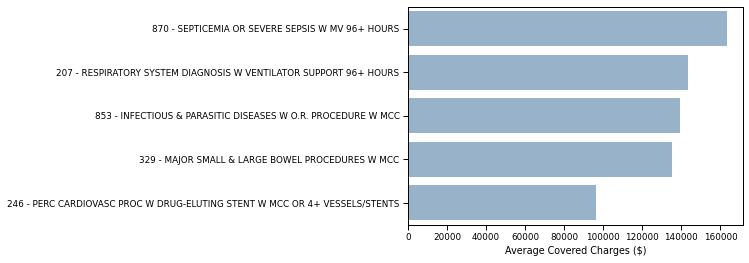

In [10]:
# Top 10 most expensive Average Covered Charges
df_table = df[['DRG Definition', ' Average Covered Charges ']].groupby(by='DRG Definition').agg(['mean','std','count'])
df_table = df_table.sort_values((' Average Covered Charges ',  'mean'), ascending=False).head(5)

fig,ax= plt.subplots()
fig = sns.barplot( df_table.iloc[:,0],df_table.index, color="steelblue",alpha=0.6)
ax.set(ylabel=None)
plt.xlabel("Average Covered Charges ($)")